
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_excel("DatosMadrid.xlsx", dtype={'Población': str, "Renta neta media anual de los hogares": str })
df = pd.DataFrame(df)
df.head()

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Seguridad Percibida de Noche,Delitos intervencion policial,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n
0,Madrid,Centro,NaN,140991,10919,107548,22006,43.89,261.823804,5.228,...,69.8,1936,309,4830.0,-0.200,-1.000,-5.100,5096.0,77.3,73.6
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,69.8,325,52,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,69.8,648,104,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,69.8,148,24,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6
4,Madrid,Centro,Justicia,18092,1419,13775,2827,44.09,243.827493,0.742,...,69.8,248,40,5707.0,0.012,-1.700,-1.700,6120.0,77.3,73.6


In [29]:
"""poblacion por distrito.                                                          OK
conteo distritos                                                                    OK
renta por educacion                                                                 OK
renta media y desempleo por distrito                                                OK
educacion, universidades, sanidad, bibliotecas, deportivas, zonas verdes por barrio OK
mapear los barrios en madrid por renta                                              OK
mapeo de delitos. intervencion policial y seguridad vial                            OK
grafico calidad de vida y satisfaccion por municipio                                OK
residuos por renta                                                                  OK
inmigracion vs emigracion por barrio                                                OK
nacimientos y defunciones por distrito                                              OK
renta media vs paro                                                                 OK
zonas verdes por superficie                                                         OK"""  

'poblacion por distrito.                                                          OK\nconteo distritos                                                                    OK\nrenta por educacion                                                                 OK\nrenta media y desempleo por distrito                                                OK\neducacion, universidades, sanidad, bibliotecas, deportivas, zonas verdes por barrio OK\nmapear los barrios en madrid por renta                                              OK\nmapeo de delitos. intervencion policial y seguridad vial                            OK\ngrafico calidad de vida y satisfaccion por municipio                                OK\nresiduos por renta                                                                  OK\ninmigracion vs emigracion por barrio                                                OK\nnacimientos y defunciones por distrito                                              OK\nrenta media vs paro               

In [30]:
len(df["Distrito"].unique())

21

In [31]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta neta media anual de los hogares\n',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(pre

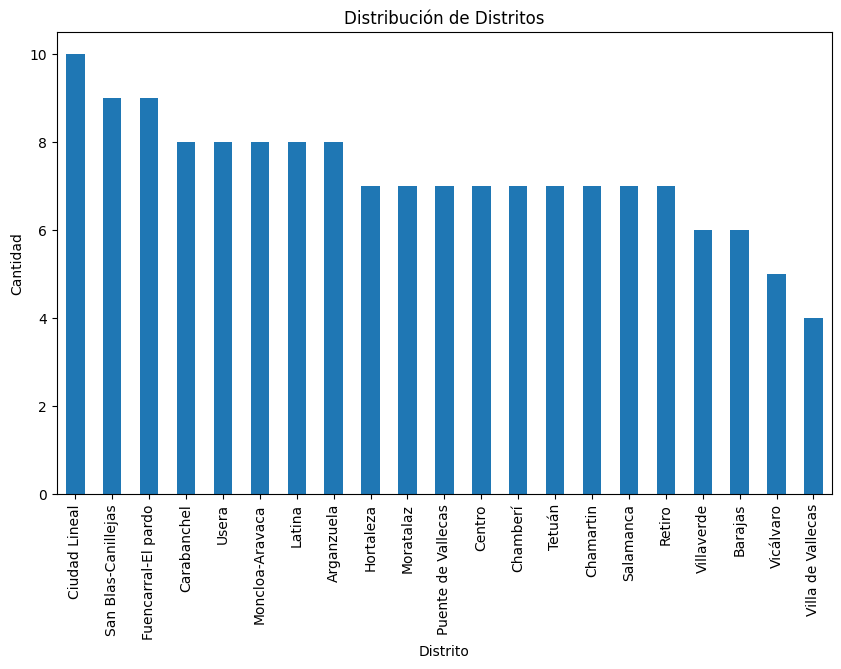

In [32]:
conteo_distritos = df['Distrito'].value_counts() 

conteo_distritos.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de Distritos')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.show()

In [33]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta neta media anual de los hogares\n',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(pre

In [34]:
df.rename(columns={"Índice de la estructura de  la población activa": "Población Activa"}, inplace=True)
df.rename(columns={"Instalaciones deportivas(Polideportivos, no básicas": "Instalaciones deportivas"}, inplace=True)
df.rename(columns={'Renta neta media anual de los hogares\n': "Renta media"}, inplace=True)
df.rename(columns={"Satisfacción de vivir en su barrio \n": "Satisfacción"}, inplace=True)
df.rename(columns={"Calidad de vida actual en su barrio \n": "Calidad de vida"}, inplace=True)

In [35]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Población Activa', 'Tasa de desempleo', 'Nacimientos',
       'Defunciones', 'Inmigración', 'Emigración', 'Renta media',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas', 'Instalaciones deportivas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(precio)', 'Satisfacción',
       'Calidad de vida'],
      dtype='object')

In [36]:
df.dtypes

Municipio                         object
Distrito                          object
Barrios                           object
Población                         object
0-15 años                          int64
16-64 años                         int64
65 o más años                      int64
Edad  promedio                   float64
Densidad                         float64
Superficie                       float64
Población Activa                 float64
Tasa de desempleo                float64
Nacimientos                        int64
Defunciones                        int64
Inmigración                        int64
Emigración                         int64
Renta media                      float64
Actividades economicas             int64
Educacion                          int64
Centros Universitarios             int64
Sanidad                            int64
Bibliotecas                      float64
Instalaciones deportivas           int64
Zonas verdes (m2)                float64
Latidud         

<Axes: xlabel='Renta media', ylabel='Density'>

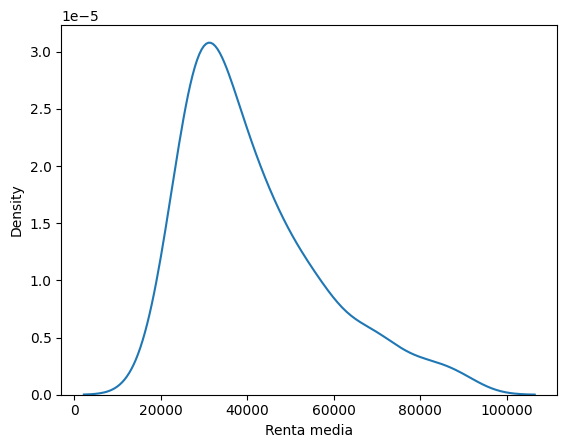

In [37]:
sns.kdeplot(data = df, x = "Renta media")

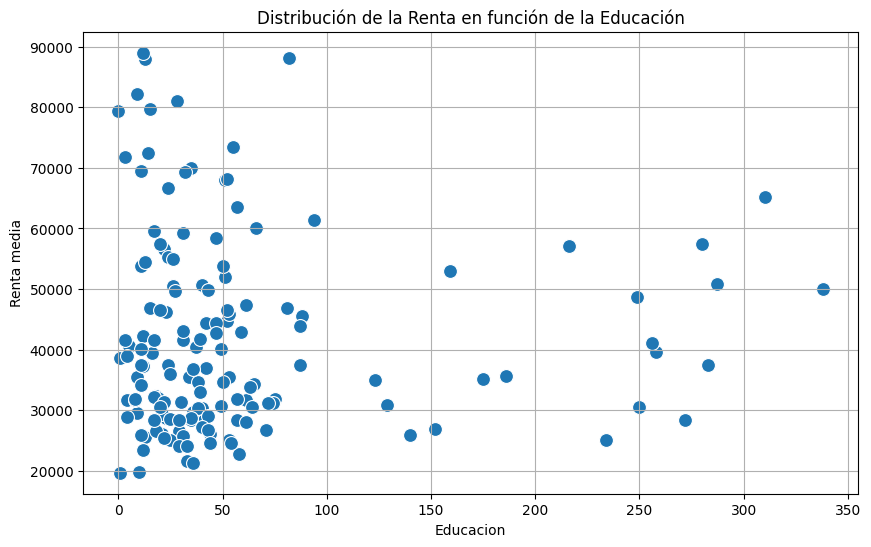

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Educacion', y='Renta media', data=df, s=100)
plt.xlabel('Educacion')
plt.ylabel('Renta media')
plt.title('Distribución de la Renta en función de la Educación')
plt.grid(True)
plt.show()

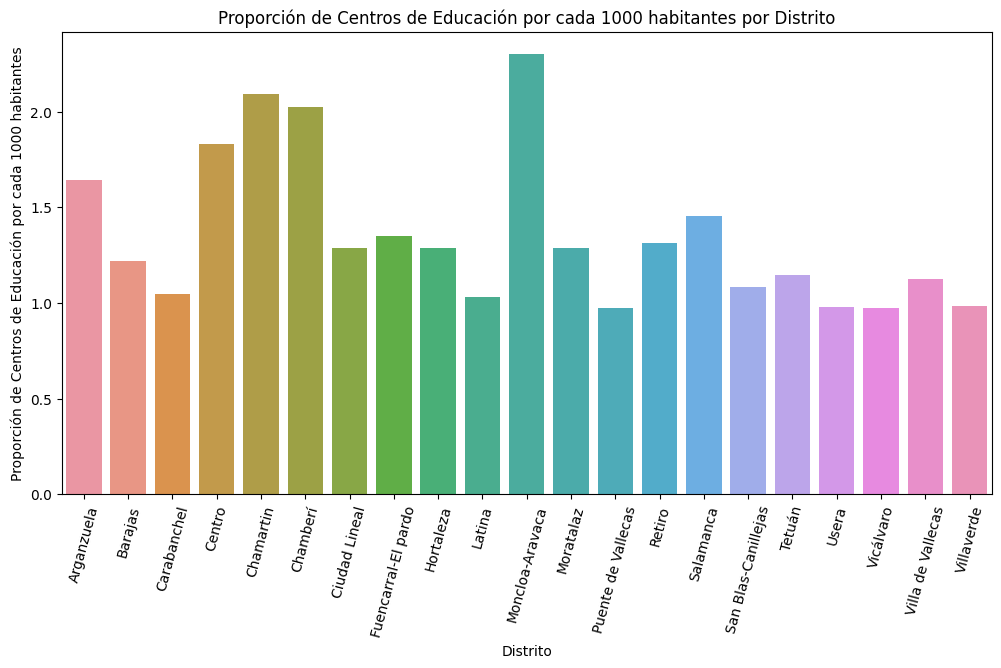

In [39]:
df['Población'] = pd.to_numeric(df['Población'], errors='coerce')
df_cleaned = df[df['Población'].notnull()]

educacion_por_distrito = df_cleaned.groupby("Distrito")["Educacion"].sum().reset_index()
educacion_por_distrito = educacion_por_distrito.merge(df_cleaned.groupby("Distrito")["Población"].sum().reset_index(), on="Distrito")
educacion_por_distrito.rename(columns={"Población": "Total_Población"}, inplace=True)
educacion_por_distrito["Proporcion por 1000 habitantes"] = (educacion_por_distrito["Educacion"] / educacion_por_distrito["Total_Población"]) * 1000

plt.figure(figsize=(12, 6))
sns.barplot(x="Distrito", y="Proporcion por 1000 habitantes", data=educacion_por_distrito)
plt.xlabel("Distrito")
plt.ylabel("Proporción de Centros de Educación por cada 1000 habitantes")
plt.xticks(rotation=75)
plt.title("Proporción de Centros de Educación por cada 1000 habitantes por Distrito")
plt.show()

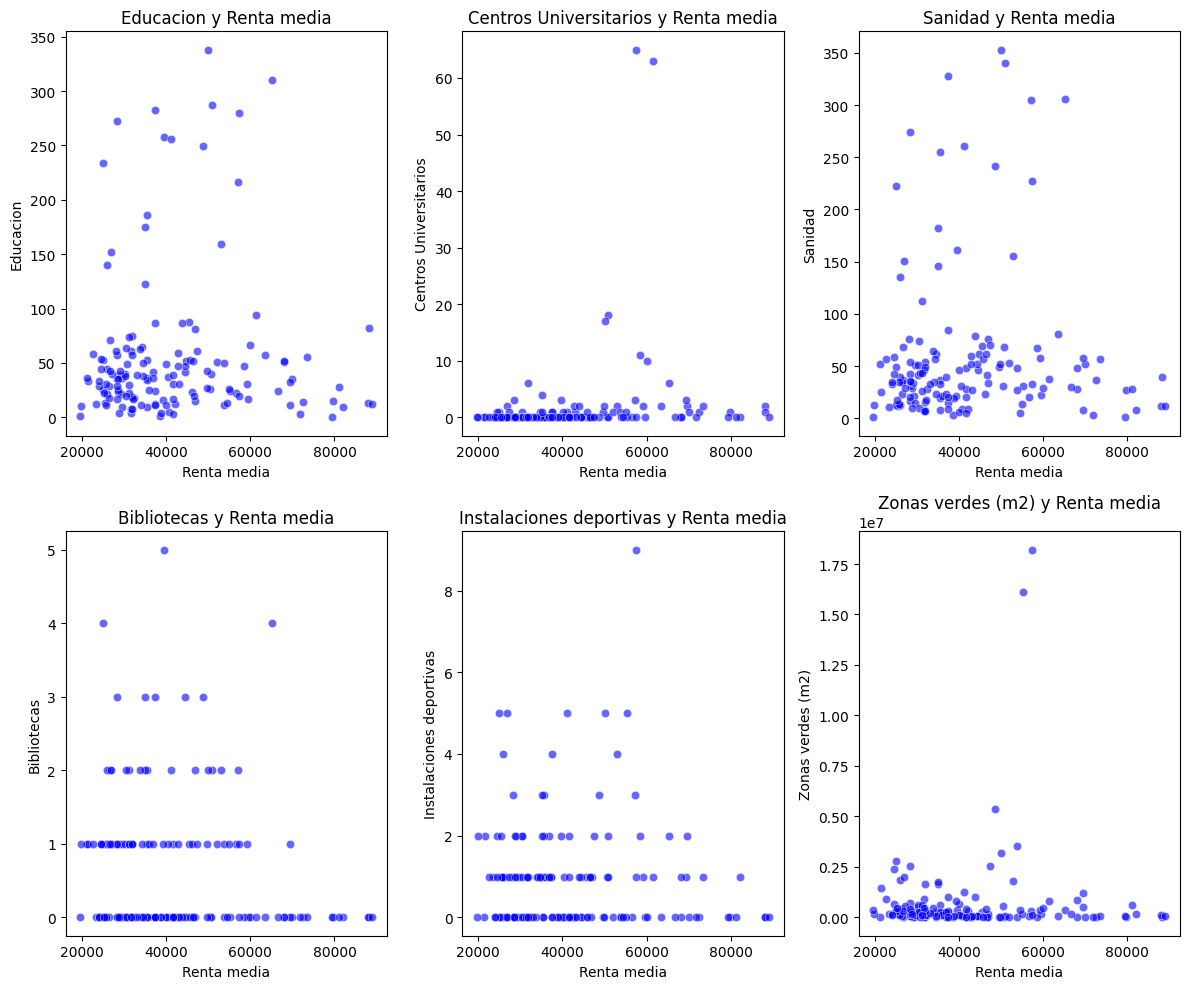

In [40]:
df['Renta media'] = pd.to_numeric(df['Renta media'], errors='coerce')

columnas_interes = ['Renta media', 'Educacion', 'Centros Universitarios', 'Sanidad', 'Bibliotecas', 'Instalaciones deportivas', 'Zonas verdes (m2)']
df_filtrado = df.dropna(subset=columnas_interes)
plt.figure(figsize=(12, 10))

for i, columna in enumerate(columnas_interes[1:], start=1):  
    plt.subplot(2, 3, i)  
    sns.scatterplot(x='Renta media', y=columna, data=df_filtrado, color='b', alpha=0.6)

    plt.xlabel('Renta media')
    plt.ylabel(columna)
    plt.title(f'{columna} y Renta media')

plt.tight_layout()
plt.show()

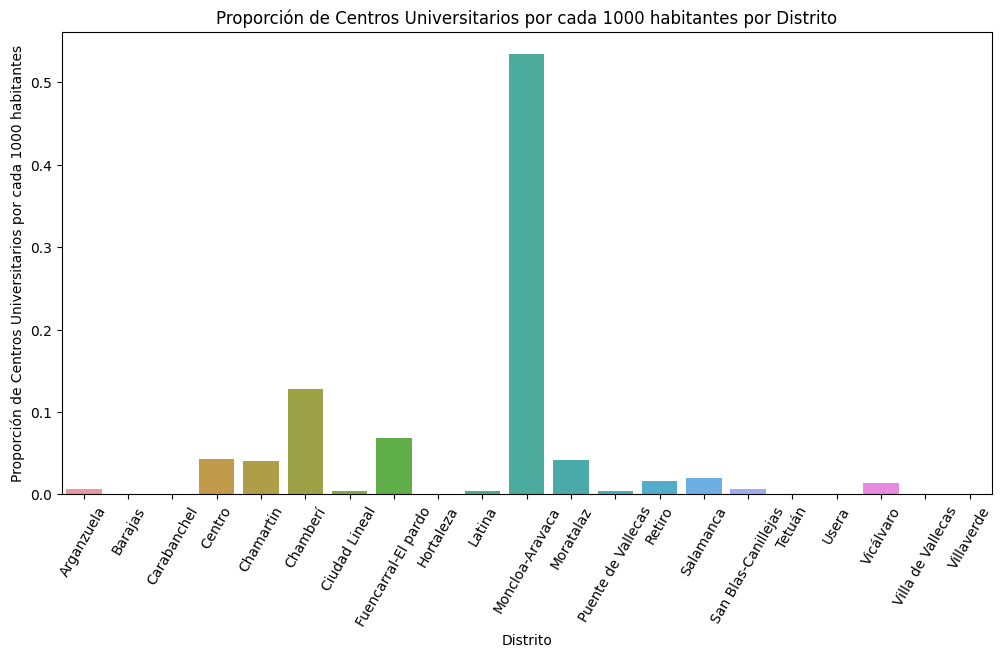

In [41]:
universitarios_por_distrito = df.groupby("Distrito")["Centros Universitarios"].sum().reset_index()
universitarios_por_distrito = universitarios_por_distrito.merge(df.groupby("Distrito")["Población"].sum().reset_index(), on="Distrito")
universitarios_por_distrito.rename(columns={"Población": "Total_Población"}, inplace=True)
universitarios_por_distrito["Proporcion por 1000 habitantes"] = (universitarios_por_distrito["Centros Universitarios"] / universitarios_por_distrito["Total_Población"]) * 1000

plt.figure(figsize=(12, 6))
sns.barplot(x="Distrito", y="Proporcion por 1000 habitantes", data=universitarios_por_distrito)
plt.xlabel("Distrito")
plt.ylabel("Proporción de Centros Universitarios por cada 1000 habitantes")
plt.xticks(rotation=60)
plt.title("Proporción de Centros Universitarios por cada 1000 habitantes por Distrito")
plt.show()

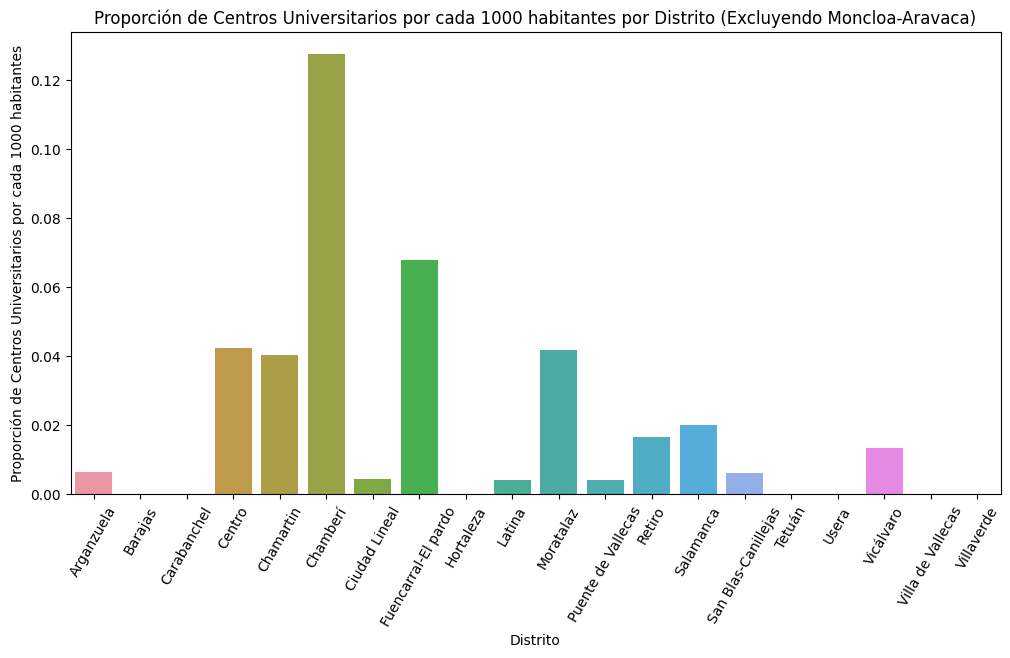

In [42]:
universitarios_por_distrito = universitarios_por_distrito[universitarios_por_distrito["Distrito"] != "Moncloa-Aravaca"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Distrito", y="Proporcion por 1000 habitantes", data=universitarios_por_distrito)
plt.xlabel("Distrito")
plt.ylabel("Proporción de Centros Universitarios por cada 1000 habitantes")
plt.xticks(rotation=60)
plt.title("Proporción de Centros Universitarios por cada 1000 habitantes por Distrito (Excluyendo Moncloa-Aravaca)")
plt.show()

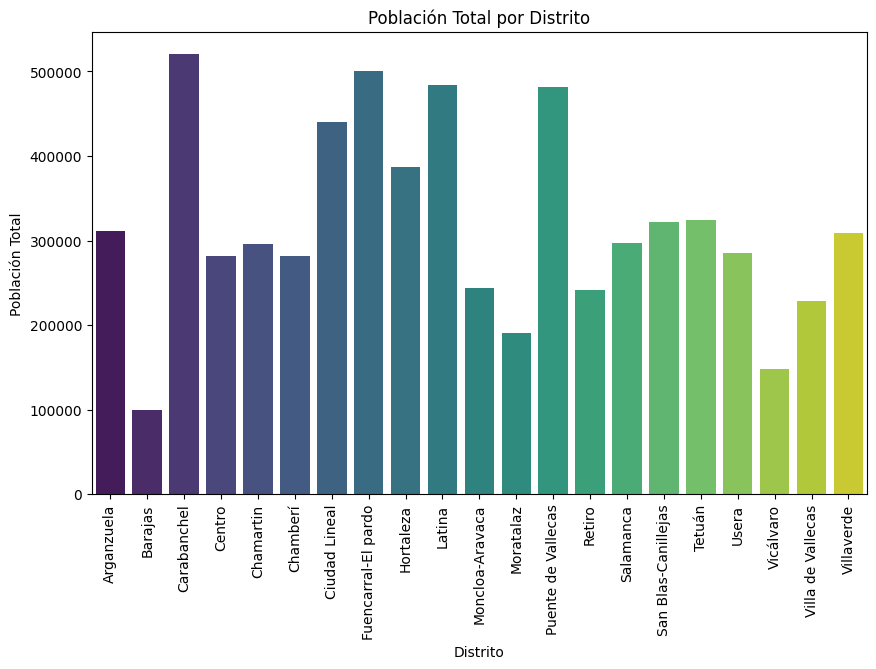

In [43]:
df = pd.read_excel('DatosMadrid.xlsx', dtype={'Población': str})
df['Población'] = df['Población'].str.replace(',', '').astype(int)
poblacion_distrito = df.groupby('Distrito')['Población'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Distrito', y='Población', data=poblacion_distrito, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Distrito')
plt.ylabel('Población Total')
plt.title('Población Total por Distrito')
plt.show()

In [44]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta neta media anual de los hogares\n',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(pre

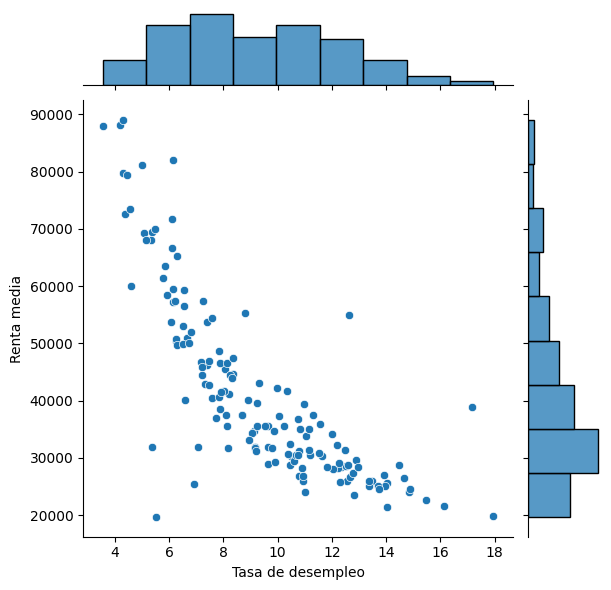

In [45]:
df.rename(columns={'Renta neta media anual de los hogares\n': "Renta media"}, inplace=True)

sns.jointplot(x=df["Tasa de desempleo"], y=df['Renta media'])
plt.xlabel("Tasa de desempleo")
plt.ylabel('Renta media')
plt.show()

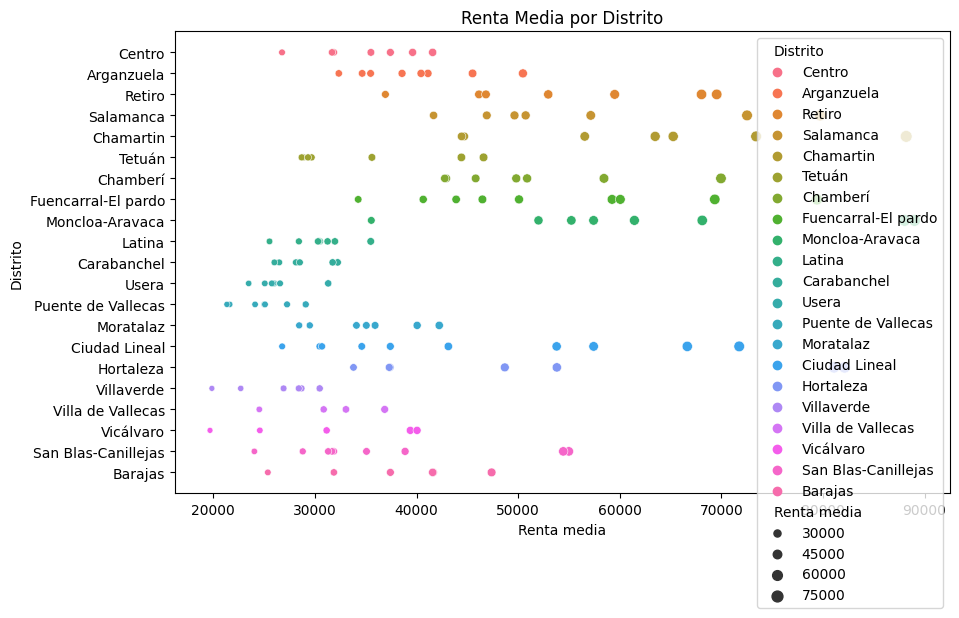

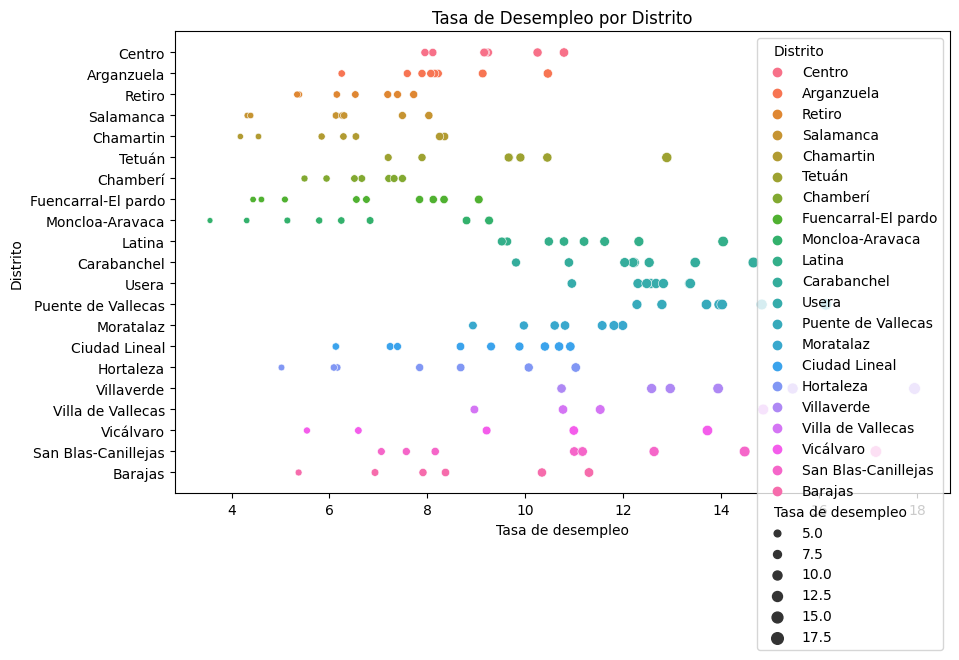

In [46]:
df = pd.read_excel("DatosMadrid.xlsx", dtype={'Población': str, "Renta neta media anual de los hogares": str })
df.rename(columns={'Renta neta media anual de los hogares\n': "Renta media"}, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Renta media", y='Distrito', hue='Distrito', size="Renta media")
plt.title('Renta Media por Distrito')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tasa de desempleo', y='Distrito', hue='Distrito', size='Tasa de desempleo')
plt.title('Tasa de Desempleo por Distrito')
plt.show()

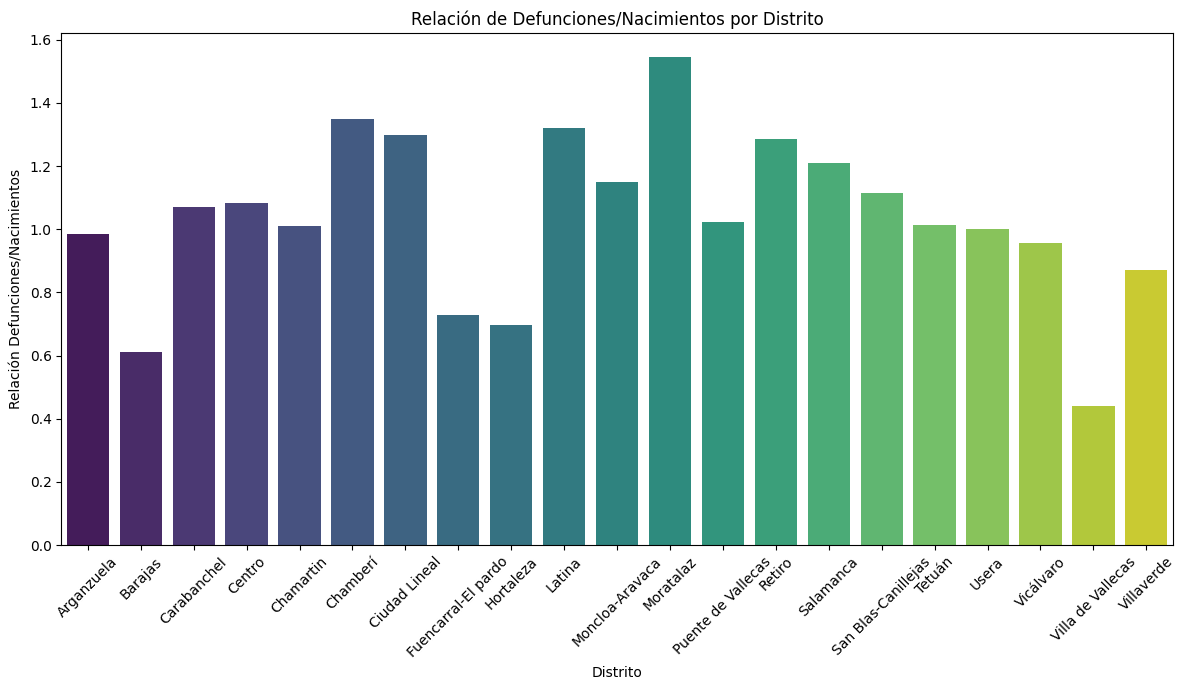

In [47]:
df_media = df.groupby('Distrito').agg({'Defunciones': 'mean', 'Nacimientos': 'mean'}).reset_index()
df_media['Relación Defunciones/Nacimientos'] = df_media['Defunciones'] / df_media['Nacimientos']

plt.figure(figsize=(12, 7))
sns.barplot(data=df_media, x='Distrito', y='Relación Defunciones/Nacimientos', palette='viridis')
plt.title('Relación de Defunciones/Nacimientos por Distrito')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta media', 'Actividades economicas', 'Educacion',
       'Centros Universitarios', 'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(precio)',
       'Satisfacción de vivi

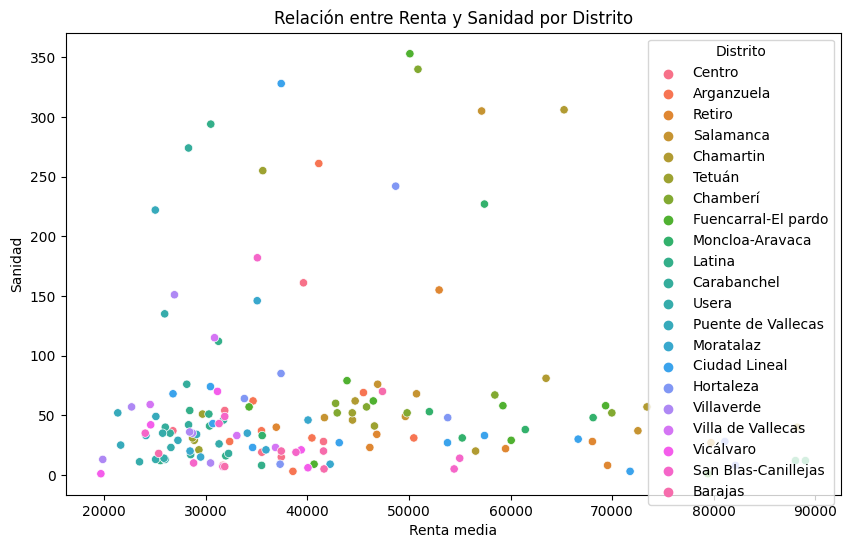

In [49]:
df = pd.read_excel("DatosMadrid.xlsx", dtype={'Renta neta media anual de los hogares\n': float, 'Sanidad': float})
df.rename(columns={'Renta neta media anual de los hogares\n': 'Renta media'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Renta media', y='Sanidad', hue='Distrito')
plt.title('Relación entre Renta y Sanidad por Distrito')
plt.show()

In [50]:
sanidad_distrio = df.groupby("Distrito")["Sanidad"].sum()

sanidad_distrio

Distrito
Arganzuela             522.0
Barajas                140.0
Carabanchel            548.0
Centro                 322.0
Chamartin              612.0
Chamberí               680.0
Ciudad Lineal          656.0
Fuencarral-El pardo    706.0
Hortaleza              484.0
Latina                 588.0
Moncloa-Aravaca        454.0
Moratalaz              292.0
Puente de Vallecas     444.0
Retiro                 310.0
Salamanca              610.0
San Blas-Canillejas    364.0
Tetuán                 480.0
Usera                  270.0
Vicálvaro              140.0
Villa de Vallecas      230.0
Villaverde             302.0
Name: Sanidad, dtype: float64

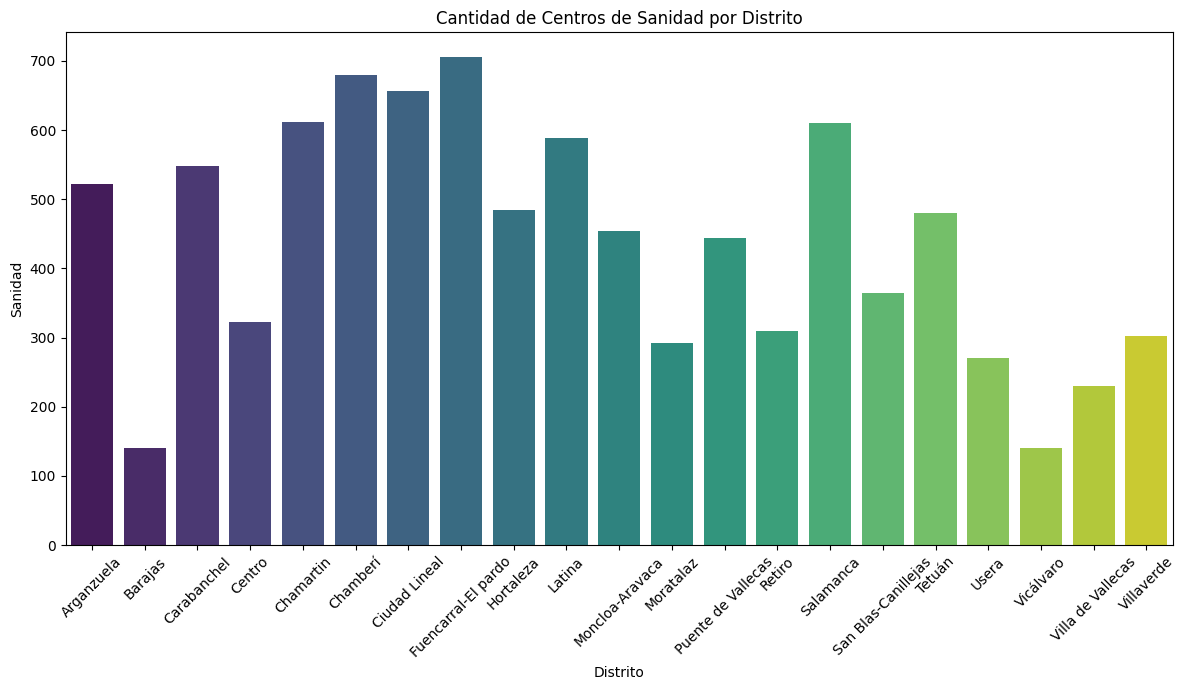

In [51]:
sanidad_por_distrito = df.groupby("Distrito")["Sanidad"].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=sanidad_por_distrito, x="Distrito", y="Sanidad", palette='viridis')
plt.title('Cantidad de Centros de Sanidad por Distrito')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

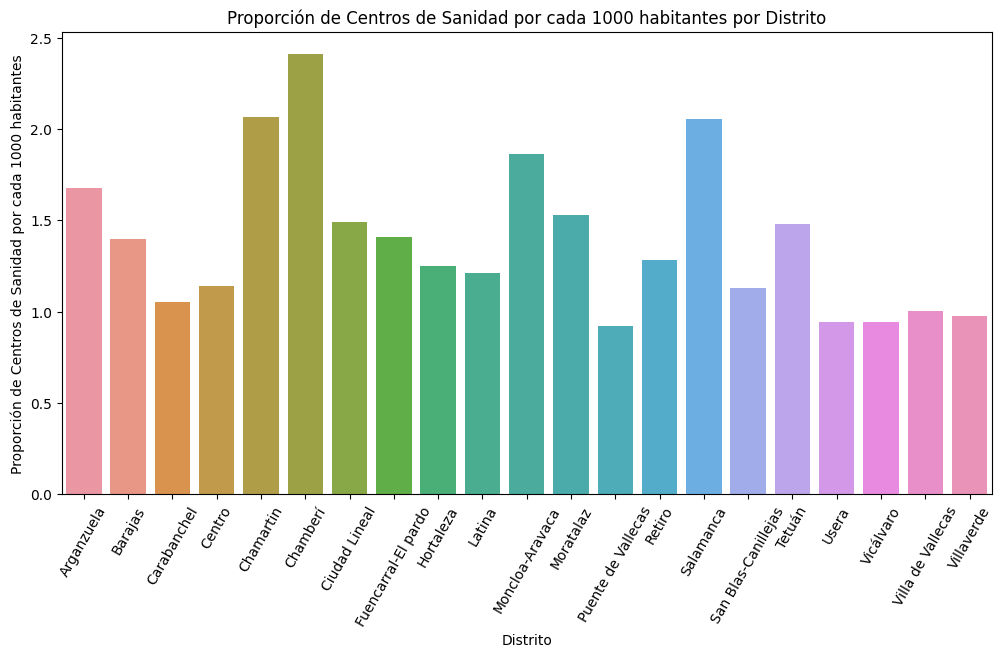

In [52]:
sanidad_por_distrito = df.groupby("Distrito")["Sanidad"].sum().reset_index()
sanidad_por_distrito = sanidad_por_distrito.merge(df.groupby("Distrito")["Población"].sum().reset_index(), on="Distrito")
sanidad_por_distrito.rename(columns={"Población": "Total_Población"}, inplace=True)
sanidad_por_distrito["Proporcion por 1000 habitantes"] = (sanidad_por_distrito["Sanidad"] / sanidad_por_distrito["Total_Población"]) * 1000

plt.figure(figsize=(12, 6))
sns.barplot(x="Distrito", y="Proporcion por 1000 habitantes", data=sanidad_por_distrito)
plt.xlabel("Distrito")
plt.ylabel("Proporción de Centros de Sanidad por cada 1000 habitantes")
plt.xticks(rotation=60)
plt.title("Proporción de Centros de Sanidad por cada 1000 habitantes por Distrito")
plt.show()

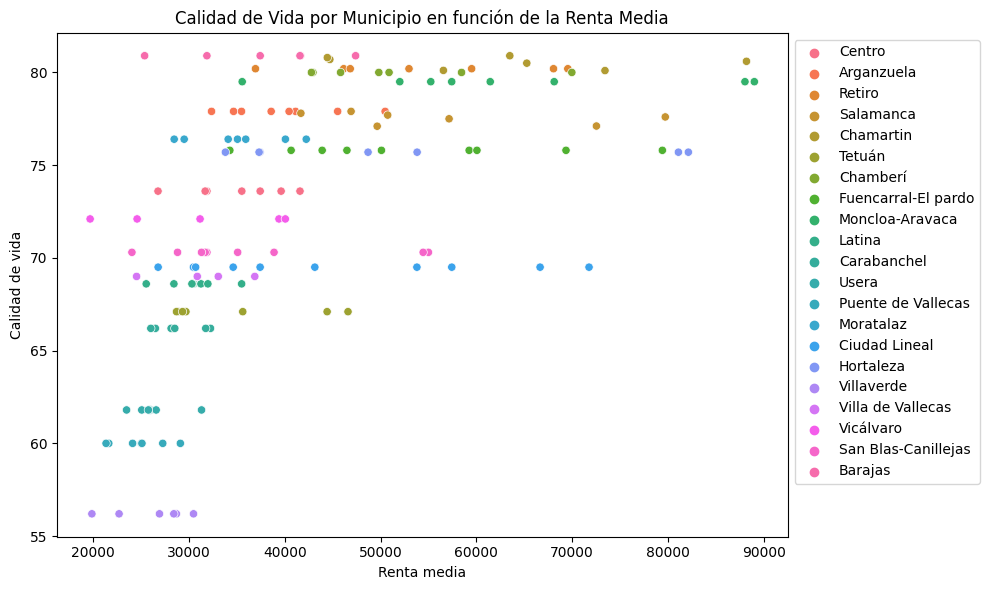

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Renta media', y='Calidad de vida actual en su barrio \n', hue='Distrito')
plt.title('Calidad de Vida por Municipio en función de la Renta Media')
plt.xlabel('Renta media')
plt.ylabel('Calidad de vida')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [54]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta media', 'Actividades economicas', 'Educacion',
       'Centros Universitarios', 'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(precio)',
       'Satisfacción de vivi

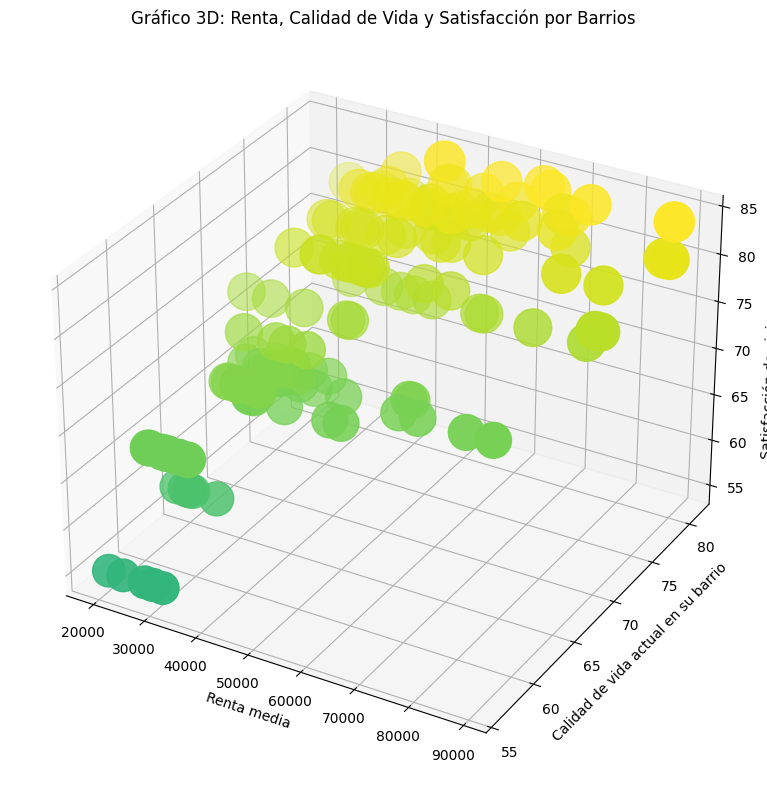

In [55]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map based on 'Barrios'
colors = plt.cm.viridis(df["Satisfacción de vivir en su barrio \n"].values / df["Satisfacción de vivir en su barrio \n"].max())

scatter = ax.scatter(df["Renta media"], df["Calidad de vida actual en su barrio \n"], df["Satisfacción de vivir en su barrio \n"], 
                     c=colors, s=df["Satisfacción de vivir en su barrio \n"]*10, depthshade=True)

ax.set_xlabel('Renta media')
ax.set_ylabel('Calidad de vida actual en su barrio')
ax.set_zlabel('Satisfacción de vivir en su barrio')
ax.set_title('Gráfico 3D: Renta, Calidad de Vida y Satisfacción por Barrios')

plt.tight_layout()
plt.show()

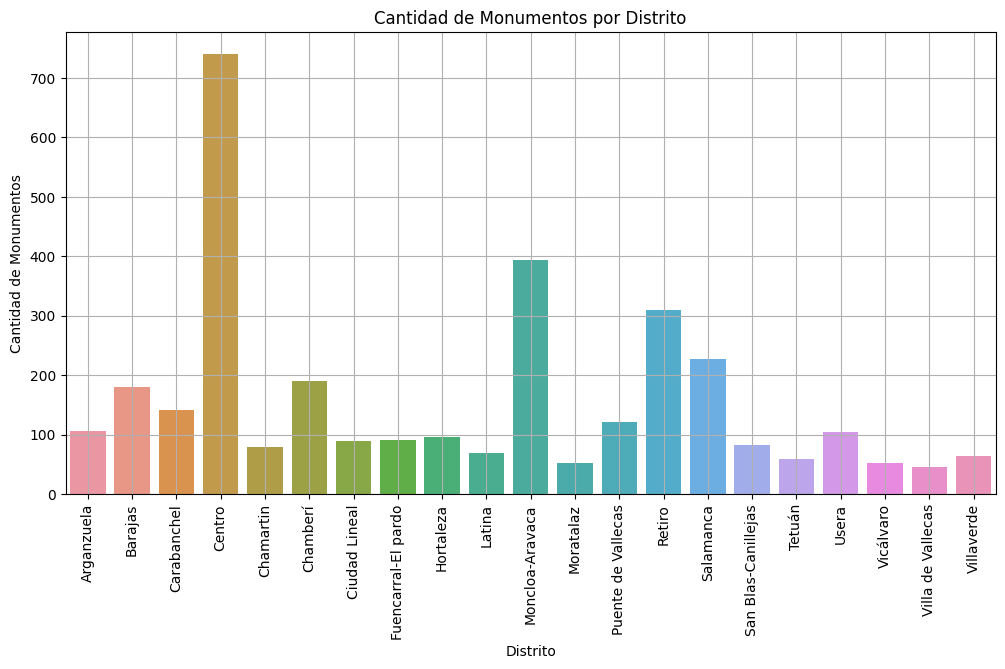

In [56]:
monumentos_por_distrito = df.groupby("Distrito")["Monumentos"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Distrito", y="Monumentos", data=monumentos_por_distrito)
plt.xlabel("Distrito")
plt.ylabel("Cantidad de Monumentos")
plt.title("Cantidad de Monumentos por Distrito")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [57]:
nacimientos_por_distrito = df.groupby("Distrito")["Nacimientos"].sum().reset_index()

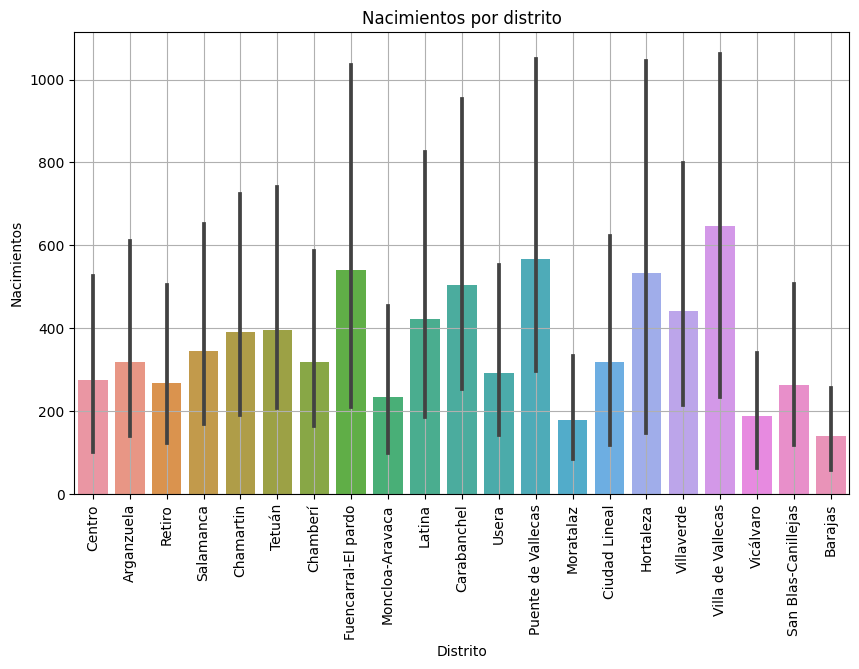

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x="Distrito", y="Nacimientos", data= df)
plt.xlabel("Distrito")
plt.ylabel("Nacimientos")
plt.title("Nacimientos por distrito")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

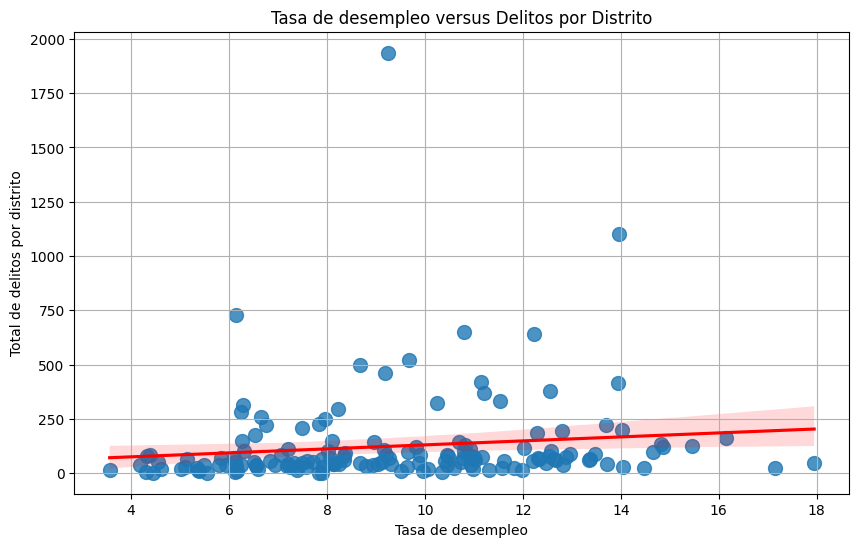

In [59]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Tasa de desempleo', y='Delitos intervencion policial', data=df, scatter_kws={'s': 100}, line_kws={"color":"red"})

plt.xlabel('Tasa de desempleo')
plt.ylabel('Total de delitos por distrito')
plt.title('Tasa de desempleo versus Delitos por Distrito')
plt.grid(True)
plt.show()

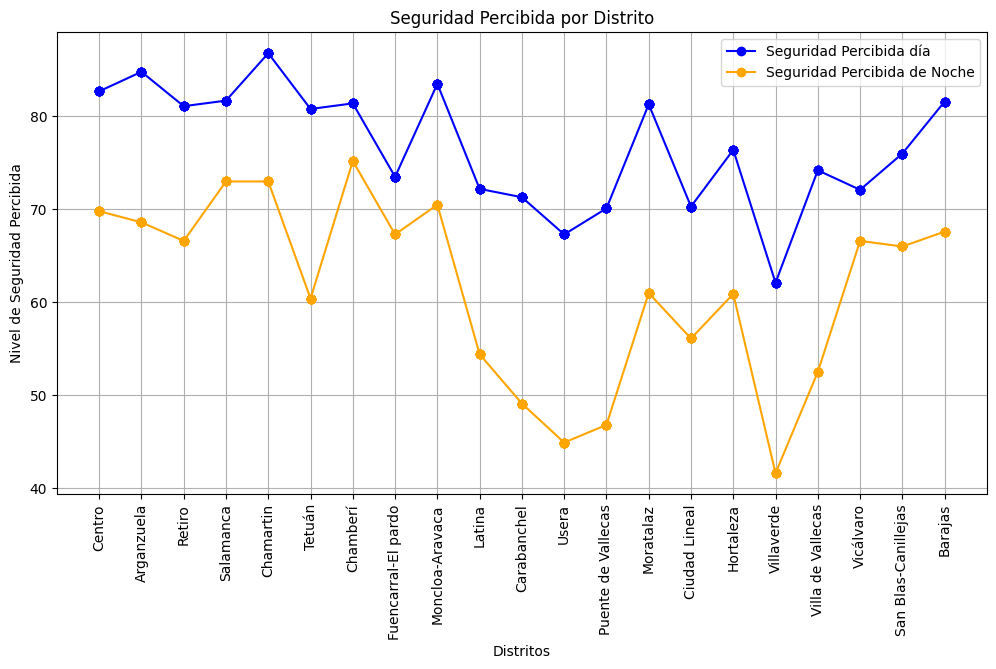

In [60]:
distritos = df['Distrito']
seguridad_dia = df['Seguridad Percibida día']
seguridad_noche = df['Seguridad Percibida de Noche']

plt.figure(figsize=(12, 6))
plt.plot(distritos, seguridad_dia, label='Seguridad Percibida día', marker='o', linestyle='-', color='blue')
plt.plot(distritos, seguridad_noche, label='Seguridad Percibida de Noche', marker='o', linestyle='-', color='orange')
plt.xlabel('Distritos')
plt.ylabel('Nivel de Seguridad Percibida')
plt.title('Seguridad Percibida por Distrito')
plt.xticks(rotation=90)  
plt.legend()
plt.grid(True)
plt.show()

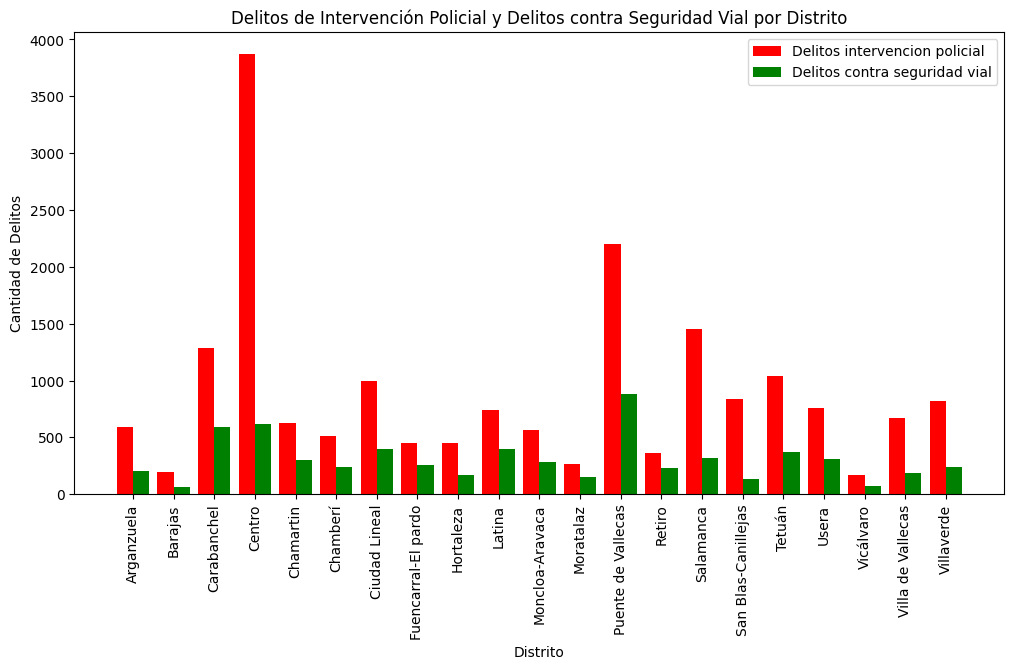

In [61]:
plt.figure(figsize=(12, 6))

delitos_por_distrito = df.groupby("Distrito")[["Delitos intervencion policial", "Delitos contra seguridad vial"]].sum().reset_index()
distritos = delitos_por_distrito['Distrito']
delitos_policial = delitos_por_distrito['Delitos intervencion policial']
delitos_seguridad_vial = delitos_por_distrito['Delitos contra seguridad vial']

ancho_barra = 0.4

posicion_barras_policial = np.arange(len(distritos))
posicion_barras_seguridad_vial = posicion_barras_policial + ancho_barra

plt.bar(posicion_barras_policial, delitos_policial, width=ancho_barra, label='Delitos intervencion policial', color='red')
plt.bar(posicion_barras_seguridad_vial, delitos_seguridad_vial, width=ancho_barra, label='Delitos contra seguridad vial', color='green')
plt.xticks(posicion_barras_policial + ancho_barra/2, distritos, rotation=90)

plt.legend()
plt.xlabel('Distrito')
plt.ylabel('Cantidad de Delitos')
plt.title('Delitos de Intervención Policial y Delitos contra Seguridad Vial por Distrito')
plt.show()

In [62]:
df['Tasa delitos intervencion policial (por 1000 habitantes)'] = (df["Delitos intervencion policial"] / df['Población']) * 1000
df["Tasa delitos intervencion policial (por 1000 habitantes)"]

0      13.731373
1      13.715974
2      13.721836
3      13.712591
4      13.707716
         ...    
147     1.917255
148     2.105263
149     2.082520
150     2.100677
151     2.063451
Name: Tasa delitos intervencion policial (por 1000 habitantes), Length: 152, dtype: float64

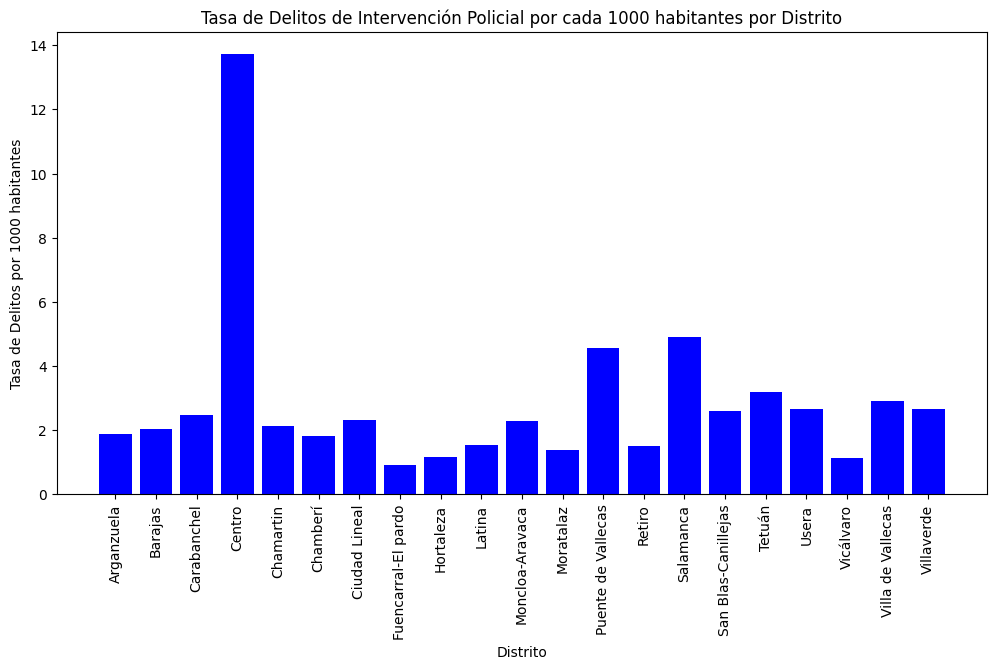

In [63]:
df['Tasa delitos intervencion policial (por 1000 habitantes)'] = (df['Delitos intervencion policial'] / df['Población']) * 1000
tasa_delitos_por_distrito = df.groupby('Distrito')['Tasa delitos intervencion policial (por 1000 habitantes)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(tasa_delitos_por_distrito['Distrito'], tasa_delitos_por_distrito['Tasa delitos intervencion policial (por 1000 habitantes)'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Distrito')
plt.ylabel('Tasa de Delitos por 1000 habitantes')
plt.title('Tasa de Delitos de Intervención Policial por cada 1000 habitantes por Distrito')
plt.show()


In [64]:
df_filtered = df[df['Distrito'] != 'Centro'].copy()
df_filtered['Tasa delitos intervencion policial (por 1000 habitantes)'] = (df_filtered['Delitos intervencion policial'] / df_filtered['Población']) * 1000
tasa_delitos_por_municipio = df_filtered.groupby('Municipio')['Tasa delitos intervencion policial (por 1000 habitantes)'].mean().reset_index()

tasa_delitos_por_municipio

,Municipio,Tasa delitos intervencion policial (por 1000 habitantes)
0,Madrid,2.281972


In [65]:
df_centro = df[df['Distrito'] == 'Centro'].copy()
df_centro['Tasa delitos intervencion policial (por 1000 habitantes)'] = (df_centro['Delitos intervencion policial'] / df_centro['Población']) * 1000
media_centro = df_centro['Tasa delitos intervencion policial (por 1000 habitantes)'].mean()

media_centro

13.719333254483173

In [66]:
media_municipio = tasa_delitos_por_municipio['Tasa delitos intervencion policial (por 1000 habitantes)'].mean()
proporcion_centro = media_centro / media_municipio

proporcion_centro

6.012050735471624

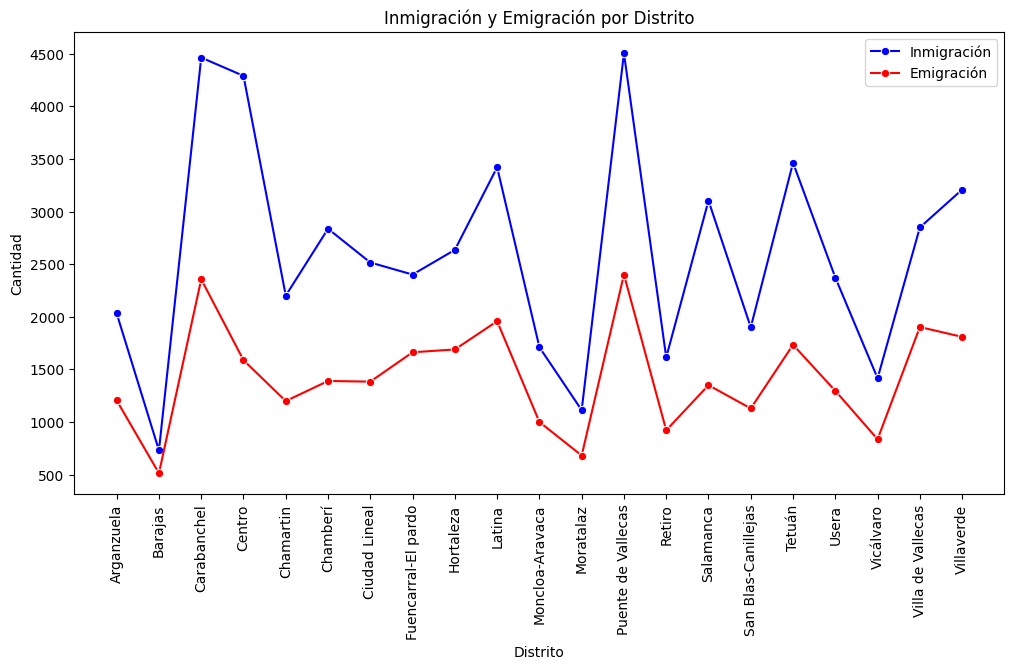

In [67]:
df_immigration_emigration = df[['Distrito', 'Inmigración', 'Emigración']].groupby('Distrito').mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_immigration_emigration, x='Distrito', y='Inmigración', marker='o', color='blue', label='Inmigración')
sns.lineplot(data=df_immigration_emigration, x='Distrito', y='Emigración', marker='o', color='red', label='Emigración')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.title('Inmigración y Emigración por Distrito')
plt.xticks(rotation=90)
plt.legend()
plt.show()

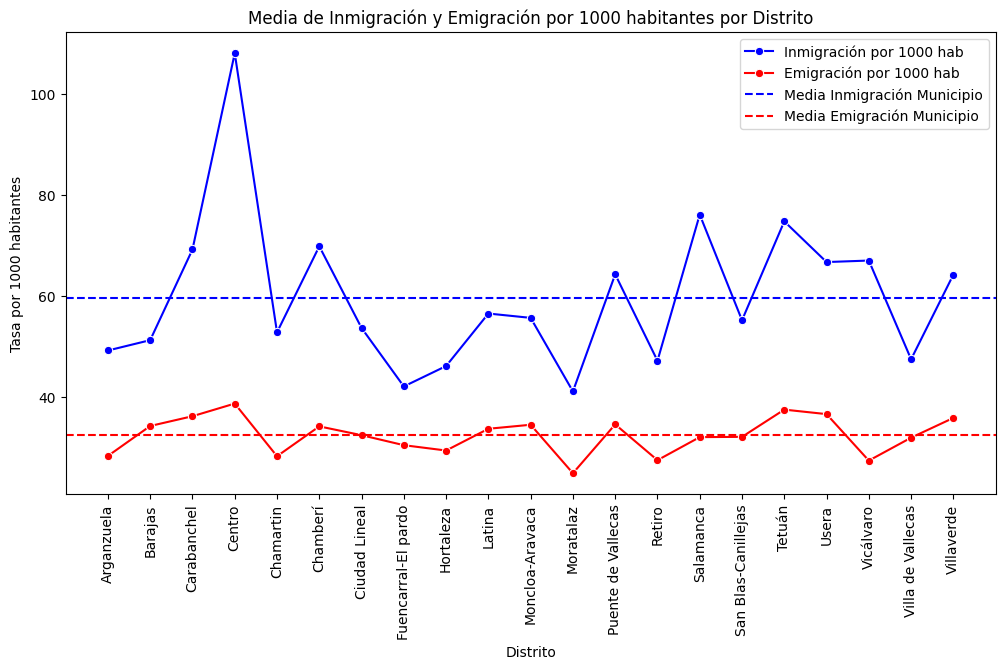

In [68]:
df_immigration_emigration = df[['Distrito', 'Inmigración', 'Emigración', 'Población']].copy()

df_immigration_emigration['Inmigración por 1000 hab'] = df_immigration_emigration['Inmigración'] / (df_immigration_emigration['Población'] / 1000)
df_immigration_emigration['Emigración por 1000 hab'] = df_immigration_emigration['Emigración'] / (df_immigration_emigration['Población'] / 1000)
df_immigration_emigration_mean = df_immigration_emigration.groupby('Distrito')[['Inmigración por 1000 hab', 'Emigración por 1000 hab']].mean().reset_index()

media_inmigracion_municipio = df_immigration_emigration['Inmigración'].sum() / df_immigration_emigration['Población'].sum() * 1000
media_emigracion_municipio = df_immigration_emigration['Emigración'].sum() / df_immigration_emigration['Población'].sum() * 1000

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_immigration_emigration_mean, x='Distrito', y='Inmigración por 1000 hab', marker='o', color='blue', label='Inmigración por 1000 hab')
sns.lineplot(data=df_immigration_emigration_mean, x='Distrito', y='Emigración por 1000 hab', marker='o', color='red', label='Emigración por 1000 hab')
plt.axhline(y=media_inmigracion_municipio, color='blue', linestyle='--', label='Media Inmigración Municipio')
plt.axhline(y=media_emigracion_municipio, color='red', linestyle='--', label='Media Emigración Municipio')
plt.xlabel('Distrito')
plt.ylabel('Tasa por 1000 habitantes')
plt.title('Media de Inmigración y Emigración por 1000 habitantes por Distrito')
plt.xticks(rotation=90)
plt.legend()
plt.show()

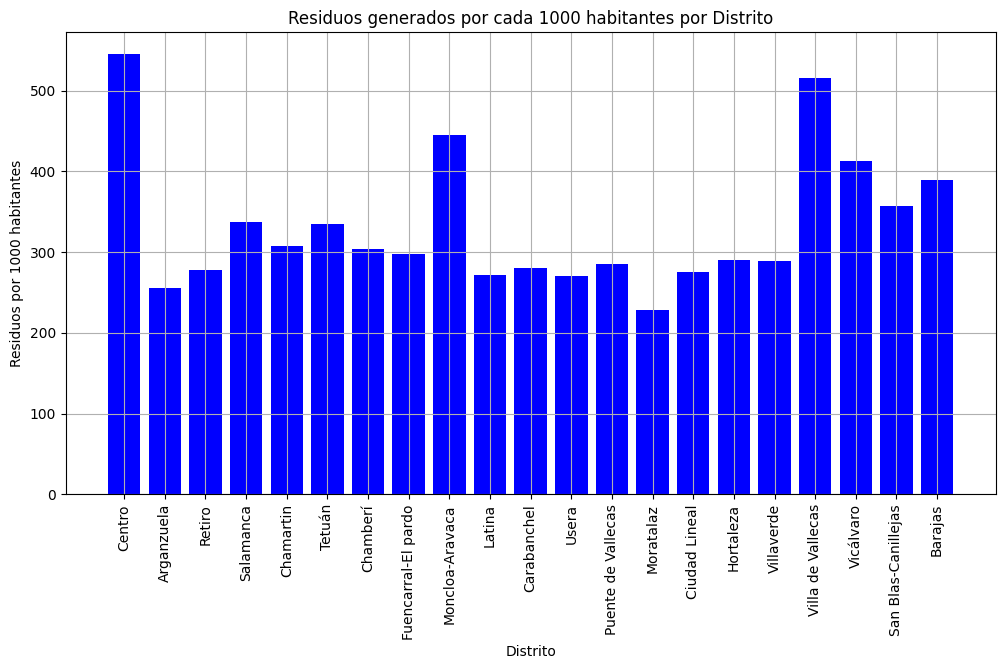

In [69]:
df_residuos = df[['Distrito', 'Residuos generados']].copy()
df_residuos['Residuos por 1000 habitantes'] = df_residuos['Residuos generados'] / (df['Población'] / 1000)

plt.figure(figsize=(12, 6))
plt.bar(df_residuos['Distrito'], df_residuos['Residuos por 1000 habitantes'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Distrito')
plt.ylabel('Residuos por 1000 habitantes')
plt.title('Residuos generados por cada 1000 habitantes por Distrito')
plt.grid()
plt.show()

In [70]:
residuos_totales = df['Residuos generados'].sum()
poblacion_total = df['Población'].sum()
media_residuos_municipio = residuos_totales / (poblacion_total / 1000)

media_residuos_municipio

318.08220158893334

### Observaciones

La proporción de centros sanitarios y educativos son inferiores en los barrios con rentas menores.

Menos educación y sanidad hace que haya más paro en barrios de rentas bajas.

No hay desajustes en cuanto a bibliotecas e instalaciones deportivas por distritos.

Sobre universidades, no encontré nada concluyente. Salvo la universidad Complutense que está en Moncloa y me desajustaba el primer gráfico.

La seguridad percibida es más baja en barrios con rentas menores y se dispara la inseguridad al caer la noche en barrios de rentas bajas.

Curioso es el caso de Centro, que multiplicando por 6 los delitos (se disparan a 14 por cada 1000 habitantes) de la media habiendolo excluido. Es el quinto distrito en seguridad nocturna.

Hay más delitos en barrios con menor tasa de paro como Centro y Salamanca que en barrios de rentas bajas, a excepción de Puente de Vallecas.

Sin conclusiones en cuanto a residuos.

En inmigración. Ligeras tendencias ascendentes en barrios de rentas altas como Centro y Salamanca (seguramente inversores extranjeros), y en los barrios de Usera y Tetuán,
    posiblemente, estos últimos, asiáticos.

Y para concluir, la emigración sin desajustes.